TAREA 2

Mishelle Culcay

Ejercicio 1
Basado en las sesiones de Visualización de datos y Expresiones resulares. Realice una adaptación de la solución del MAP OF SCIENCE. Se requiere dos adaptaciones para resolver esta actividad:

Buscar bibliografía de un tema de interés propio en la Página Web de PubMed,
Realizar el minado de autores por país (en el ejemplo se encuentra realziado por las ciudades de USA).
Para asignar las ubicación geográfica de los centroides de cada país (latitud y longitud), utilice la tabla Ubicación Geográfica de Países - Google Developer. Así como en la solución de referencia se señalan varias ciudades seleccionadas de USA.
En su resolución señale/resalte a los siguientes países: USA, UK, Brazil, China, Australia, Norway.
Cargue su cuaderno de Jupyter en GitHub, asegurandose de lo siguiente:

En el documento se puede ver con claridad el Mapa de Ciencia de su tema de interés.
La figura tiene etiquetas adecuadas en los ejes de la visualización.
Se tiene al menos tres controles de la versión (3 commit con mensajes adecuados sobre la versión)

In [354]:
#Descargar librerias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math 
import seaborn as sns
import pandas as pd

In [355]:
import re
import csv

In [356]:
with open("pubmed-coloncance-set.txt", encoding= 'utf-8') as f:
    datos = f.read()

In [357]:
datos = re.sub(r'\n\s{6}', ' ', datos)
dat= re.findall (r"\,\s[A-zA-Z]{2,13}\.", datos)

In [358]:
zipcodes = re.findall (r"\,\s[A-zA-Z]{2,13}\.", datos)

In [359]:
unique_zipcodes = list(set(zipcodes))

In [360]:
unique_zipcodes.sort()

In [361]:
a = unique_zipcodes
print(a)

[', AL.', ', AZ.', ', Aichi.', ', Argentina.', ', Arizona.', ', Aurora.', ', Australia.', ', Austria.', ', Av.', ', Aviano.', ', Az.', ', Baltimore.', ', Bangladesh.', ', Basel.', ', Belgium.', ', Biella.', ', Boston.', ', Brazil.', ', Brazil].', ', Bulgaria.', ', CA.', ', Calif.', ', California.', ', Canada.', ', Catania.', ', Charleston.', ', Chile.', ', China.', ', Co.', ', Colombia.', ', Colorado.', ', Connecticut.', ', Copenhagen.', ', Cra.', ', Croatia.', ', Cuba.', ', Cyprus.', ', Delaware.', ', Denmark.', ', Denver.', ', Dept.', ', Deutschland.', ', Dr.', ', Dysplasia.', ', Ecuador.', ', Edinburgh.', ', Egypt.', ', Eindhoven.', ', Estonia.', ', FL.', ', Fac.', ', Finland.', ', Florida.', ', France.', ', Franz.', ', Fukuoka.', ', Gainesville.', ', Georgia.', ', Germany.', ', Gifu.', ', Greece.', ', HI.', ', Hawaii.', ', Hiroshima.', ', Hokkaido.', ', Hubei.', ', Hungary.', ', Hyogo.', ', IA.', ', IN.', ', IND.', ', Iceland.', ', Ill.', ', Illinois.', ', Inc.', ', India.', ', Ind

In [362]:
b = unique_zipcodes
b.remove(', AL.')
b.remove(', Aichi.')
b.remove(', AZ.')
b.remove(', Av.')
b.remove(', Dept.')
b.remove(', Co.')
b.remove(', Calif.')
b.remove(', OH.')
b.remove(', ON.')
b.remove(', OR.')
b.remove(', RI.')
b.remove(', ROC.')
b.remove(', Dr.')
b.remove(', Az.')
b.remove(', CA.')
b.remove(', Cra.')
unique_zipcodes[:20]

[', Argentina.',
 ', Arizona.',
 ', Aurora.',
 ', Australia.',
 ', Austria.',
 ', Aviano.',
 ', Baltimore.',
 ', Bangladesh.',
 ', Basel.',
 ', Belgium.',
 ', Biella.',
 ', Boston.',
 ', Brazil.',
 ', Brazil].',
 ', Bulgaria.',
 ', California.',
 ', Canada.',
 ', Catania.',
 ', Charleston.',
 ', Chile.']

In [363]:
c = "".join(b)
d = c.split(", ")
e = "".join(d)
f = e.split(".")
f.pop(8)
unique_zipcodes = f
unique_zipcodes[:20]

['Argentina',
 'Arizona',
 'Aurora',
 'Australia',
 'Austria',
 'Aviano',
 'Baltimore',
 'Bangladesh',
 'Belgium',
 'Biella',
 'Boston',
 'Brazil',
 'Brazil]',
 'Bulgaria',
 'California',
 'Canada',
 'Catania',
 'Charleston',
 'Chile',
 'China']

In [364]:
len(unique_zipcodes)

228

In [365]:
data = pd.read_csv('zipcodes_coordinates.csv', engine='python', skipfooter=3)
data.head(10)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [366]:
data_nombre = data[data.name.isin(unique_zipcodes)]
data_paises = data[data.country.isin(unique_zipcodes)]
all_data =pd.concat([data_nombre,data_paises]).drop_duplicates().sort_values('name')

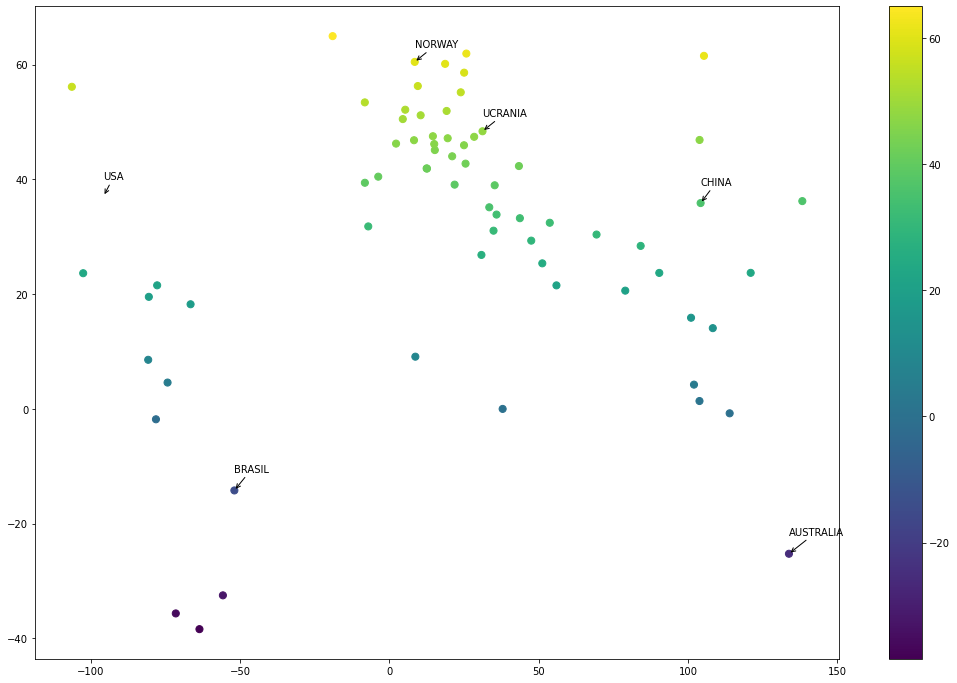

In [367]:
import matplotlib.pyplot as plt
plt.scatter(all_data.longitude, all_data.latitude, s=50, c=all_data.latitude)
plt.colorbar()

ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)
plt.annotate('UCRANIA', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard)
plt.annotate('BRASIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)
plt.annotate('NORWAY', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show() 